# Part 1
Converting pdf to image

In [1]:
#Installing dependencies
!pip install pytesseract
!pip install pdf2image
!pip install opencv-python
!pip install img2pdf
!apt-get install poppler-utils  ##To install poppler for pdf2image converter
!sudo apt install tesseract-ocr
!apt-get update

  Using cached img2pdf-0.4.4.tar.gz (97 kB)
  Using cached pikepdf-5.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.3 MB)
  Created wheel for img2pdf: filename=img2pdf-0.4.4-py3-none-any.whl size=44881 sha256=ee85592c3ce879ddd87e0286936bcb9109f20a0ee652d605d6b24c0dec39f2fb
  Stored in directory: /root/.cache/pip/wheels/d2/a7/53/9983aef9861f91881984e08f376e3119bdfeeecf55bd36e585
Successfully built img2pdf
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (380 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155455 files and directories c

In [2]:
#importing Depedency
import pytesseract
import cv2
import numpy as np
import pandas as pd
import pdf2image
import matplotlib.pyplot as plt
%matplotlib inline
import imutils


In [3]:
#creating function to convert pdf into image and storring it at specified path
# Reference:-https://pdf2image.readthedocs.io/en/latest/reference.html
def pdfTOimage(inpath,image_path,OUTPUT_FOLDER = None,FIRST_PAGE = None,LAST_PAGE = None,FORMAT = 'jpg',USERPWD = None,USE_CROPBOX = False,STRICT = False):
  """Function to convert pdf into image and storring it at specified path
  inpath:Input path of PDF to be converted into image
  image_path:Path for converted images to be stored
  OUTPUT_FOLDER:Output directory for the generated files, should be seen more as a “working directory” than an output folder. The converted images will be written there to save system memory
  FIRST_PAGE:First page that will be converted. first_page=2 will skip page 1
  LAST_PAGE:Last page that will be converted. last_page=2 will skip all pages after page 2
  FORMAT:File format or the output images. Supported values are ppm, jpeg, png and tiff
  USERPWD:Password for the PDF if it is password-protected
  USE_CROPBOX:Uses the PDF cropbox instead of the default mediabox. This is a rather dark feature that should be set to true when the module does not seem to work with your data.
  STRICT:Raises PDFSyntaxError when the PDF is partially malformed. Most PDF are partially malformed and that parameter should be kept to False, unless standard compliance is paramount to your use case.
  
  """
  print("Converting to Image")
  pil_image = pdf2image.convert_from_path(inpath,
                                         output_folder = OUTPUT_FOLDER,
                                         first_page = FIRST_PAGE,
                                         last_page = LAST_PAGE,
                                         fmt = FORMAT,
                                         userpw = USERPWD,
                                         use_cropbox = USE_CROPBOX,
                                         strict = STRICT)
  i=1
  for image in pil_image:
    image.save(image_path + '{}.JPEG'.format(i))
    i=i+1
  print("PDF to Image Converted")



In [4]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [5]:
inpath = "/content/INGJSURTMDHVTW0004WE0HE2002.pdf"
image_path = "/content/sample_data/Output/"
pdfTOimage(inpath,image_path)

Converting to Image
PDF to Image Converted


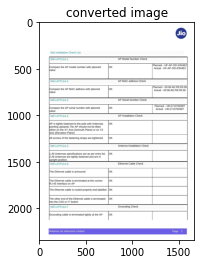

In [6]:
image = cv2.imread("/content/sample_data/Output/2.JPEG")
plt_imshow("converted image",image)

# Part 2
Image preprocessing and text extraction


In [7]:
import re
from pytesseract import Output
from textblob import TextBlob


In [8]:
def correctRotation(image):
  """Function to detect rotated images and return corrected images"""
  result = {}
  results = pytesseract.image_to_osd(image, output_type=Output.DICT)
  print("[INFO] detected orientation: {}".format(results["orientation"]))
  print("[INFO] rotate by {} degrees to correct".format(results["rotate"]))
  return imutils.rotate_bound(image, angle=results["rotate"])



In [9]:
def langTranslate(text,lan = 'en'):
  """translate the text to a different language""" 
  tb = TextBlob(text)
  translated = tb.translate(to=lan)
  return translated


In [41]:
def ExtractText(image,PSM=3):
  """  To Extract Information from image with different PSM mode(0-13)
  PSM 1. Automatic Page Segmentation with OSD
  PSM 3. Fully Automatic Page Segmentation, But no OSD
  PSM 4. Assume a Single Column of Text of Variable Sizes
  PSM 5. Assume a Single Uniform Block of Vertically Aligned Text
  PSM 6. Assume a Single Uniform Block of Text
  PSM 7. Treat the Image as a Single Text Line
  PSM 8. Treat the Image as a Single Word
  PSM 10. Treat the Image as a Single Character
  PSM 11. Sparse Text. Find as Much Text as Possible in No Particular Order.
  PSM 13. Raw Line. Treat the Image as a Single Text Line, Bypassing Hacks that are Tesseract-Specific."""
  options = "--psm {}".format(PSM)
  text = pytesseract.image_to_string(image, config=options)
  return text

In [49]:
def SpellCheck(text):
  """Return corrected text after Spell check"""
  tb = TextBlob(text)
  return tb.correct()

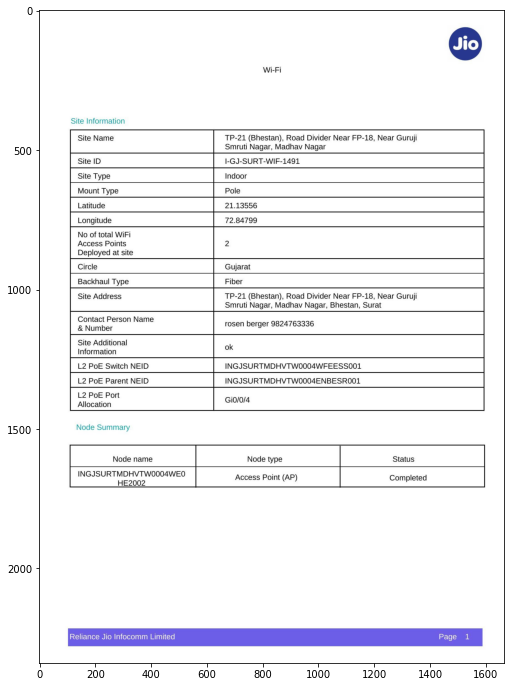

In [44]:
image = cv2.imread("/content/sample_data/Output/1.JPEG")
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.show()